<ipython-input-3-76c8947b3c3f>:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2023-01-01', end='2023-01-30 23:00', freq='H')


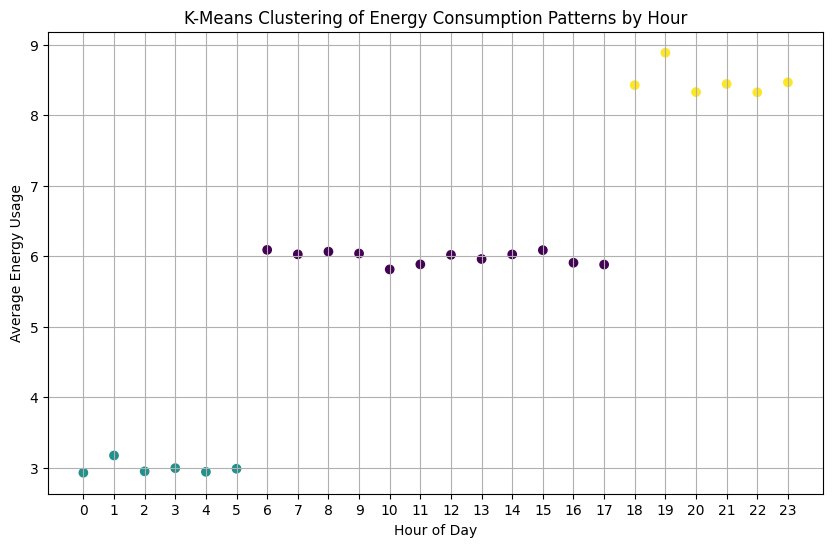

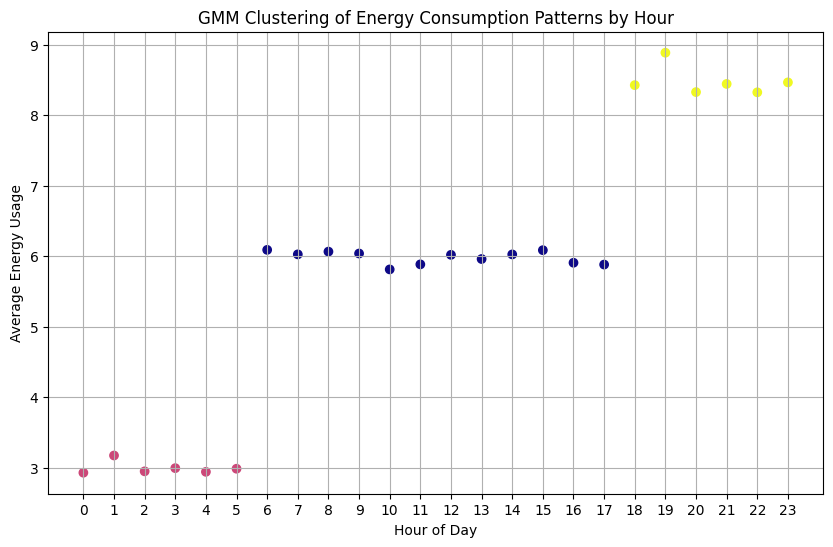

K-Means Silhouette Score: 0.9498121951340689
GMM Silhouette Score: 0.9498121951340689


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

# Generating synthetic data
np.random.seed(42)

# Create a date range for one month (hourly data for 30 days)
date_range = pd.date_range(start='2023-01-01', end='2023-01-30 23:00', freq='H')

# Simulate realistic energy usage based on the time of day
def energy_usage_pattern(hour):
    # Simulate lower usage at night (00:00-06:00), moderate during the day (06:00-18:00), higher in the evening (18:00-23:00)
    if 0 <= hour < 6:
        return np.random.uniform(2, 4)  # Low usage
    elif 6 <= hour < 18:
        return np.random.uniform(5, 7)  # Moderate usage
    else:
        return np.random.uniform(7, 10)  # High usage

# Apply the pattern to the entire date range
energy_usage = [energy_usage_pattern(ts.hour) for ts in date_range]

# Create a DataFrame
df = pd.DataFrame({'timestamp': date_range, 'energy_usage': energy_usage})
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Feature Engineering: Extract hour from timestamp
df['hour'] = df.index.hour

# Group by hour of the day to find average energy usage at each hour across the month
hourly_usage = df.groupby('hour')['energy_usage'].mean().reset_index()

# Standardizing the data (only energy usage is used for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(hourly_usage[['energy_usage']])

# K-Means Clustering (based on hourly patterns)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# GMM Clustering (based on hourly patterns)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Adding cluster labels to the hourly_usage dataframe
hourly_usage['kmeans_cluster'] = kmeans_labels
hourly_usage['gmm_cluster'] = gmm_labels

# Visualizing the K-Means clusters
plt.figure(figsize=(10, 6))
plt.scatter(hourly_usage['hour'], hourly_usage['energy_usage'], c=hourly_usage['kmeans_cluster'], cmap='viridis', label='K-Means')
plt.title('K-Means Clustering of Energy Consumption Patterns by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Usage')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Visualizing the GMM clusters
plt.figure(figsize=(10, 6))
plt.scatter(hourly_usage['hour'], hourly_usage['energy_usage'], c=hourly_usage['gmm_cluster'], cmap='plasma', label='GMM')
plt.title('GMM Clustering of Energy Consumption Patterns by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Usage')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Calculate silhouette scores to evaluate clustering
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"GMM Silhouette Score: {gmm_silhouette}")


In [ ]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Create a date range for one month (hourly data for 30 days)
date_range = pd.date_range(start='2023-01-01', end='2023-01-30 23:00', freq='H')

# Simulate realistic energy usage based on the time of day
def energy_usage_pattern(hour):
    # Simulate lower usage at night (00:00-06:00), moderate during the day (06:00-18:00), higher in the evening (18:00-23:00)
    if 0 <= hour < 6:
        return np.random.uniform(2, 4)  # Low usage
    elif 6 <= hour < 18:
        return np.random.uniform(5, 7)  # Moderate usage
    else:
        return np.random.uniform(7, 10)  # High usage

# Generate energy usage data
energy_usage = [energy_usage_pattern(ts.hour) for ts in date_range]

# Create a DataFrame
df = pd.DataFrame({'timestamp': date_range, 'energy_usage': energy_usage})

# Save the DataFrame to a CSV file
df.to_csv('energy_usage_data.csv', index=False)

print("Sample CSV file 'energy_usage_data.csv' created successfully.")


Sample CSV file 'energy_usage_data.csv' created successfully.


<ipython-input-1-542abc145442>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start='2023-01-01', end='2023-01-30 23:00', freq='H')
